In [2]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers
import matplotlib.pyplot as plt
import pandas as pd


Working on function: Ackley
0.6772301335096648
******
******
Working on function: Bukin
0.8554043043883894
******
******
Working on function: Cross in Tray
0.9706415949728975
******
******
Working on function: Drop Wave
0.6821733997491531
******
******
Working on function: Eggholder
0.8525765511548532
******
******
Working on function: Gramacy Lee
0.8193144541360537
******
******
Working on function: Holder Table
0.8481774013748477
******
******
Working on function: Schaffer2
0.625654574409037
******
******
Working on function: Schaffer4
0.5540695025519781
******
******
Working on function: Schwefel
0.8244935232356461
******
******
Working on function: Shubert
0.5461833060758617
******
******
Working on function: Bohachevsky
0.9764200976638251
******
******
Working on function: Rotated Hyper Ellipsoid
0.9419215006824296
******
******
Working on function: Sphere
0.9563073889598022
******
******
Working on function: Sum of Different Powers
0.7316943954277572
******
******
Working on func

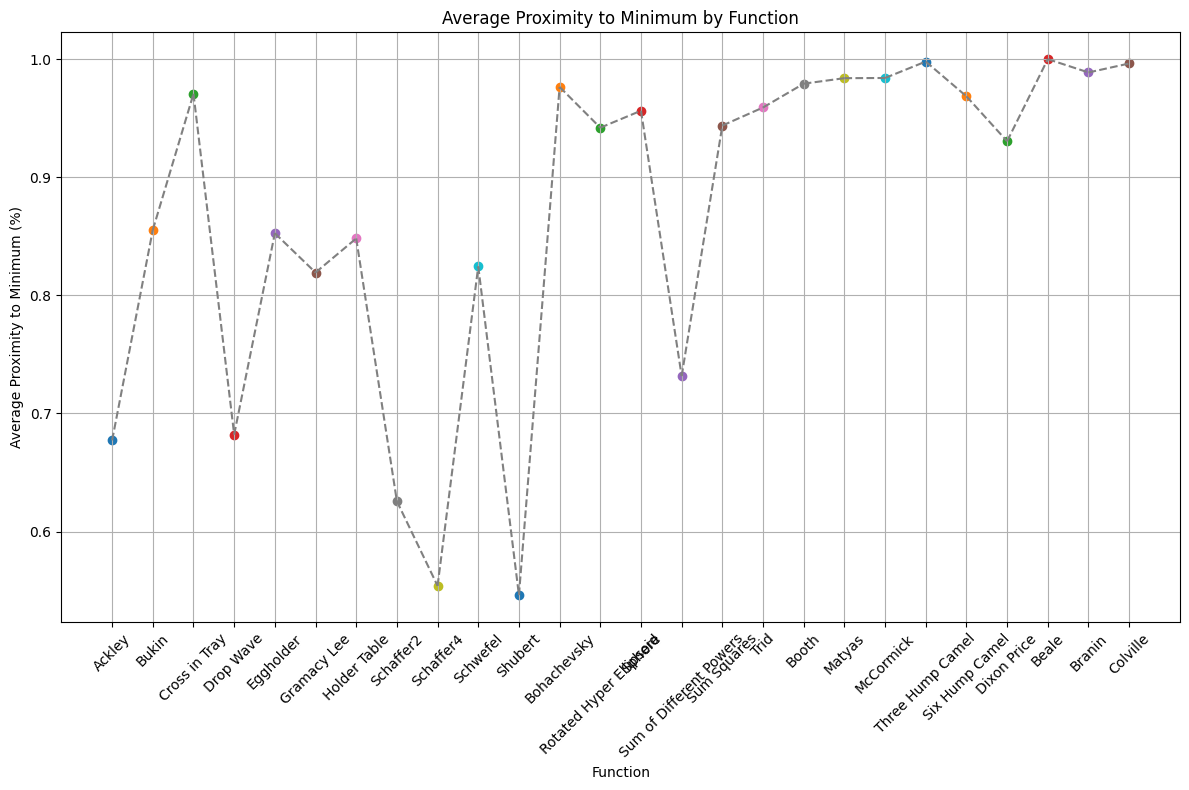

In [3]:
#15 Iterations
# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations_15(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

Working on function: Ackley
0.8641670244565773
******
******
Working on function: Bukin
0.8949754505379919
******
******
Working on function: Cross in Tray
0.8031994260032103
******
******
Working on function: Drop Wave
0.9613353863600397
******
******
Working on function: Eggholder
0.9158535441509971
******
******
Working on function: Gramacy Lee
0.9997065060177731
******
******
Working on function: Holder Table
0.9715700672851101
******
******
Working on function: Schaffer2
0.5506502607963247
******
******
Working on function: Schaffer4
0.8338856146773981
******
******
Working on function: Schwefel
0.928866468461712
******
******
Working on function: Shubert
0.6987724541299197
******
******
Working on function: Bohachevsky
0.9560722097367425
******
******
Working on function: Rotated Hyper Ellipsoid
0.9972112268165795
******
******
Working on function: Sphere
0.9922515393489745
******
******
Working on function: Sum of Different Powers
0.888354825162531
******
******
Working on funct

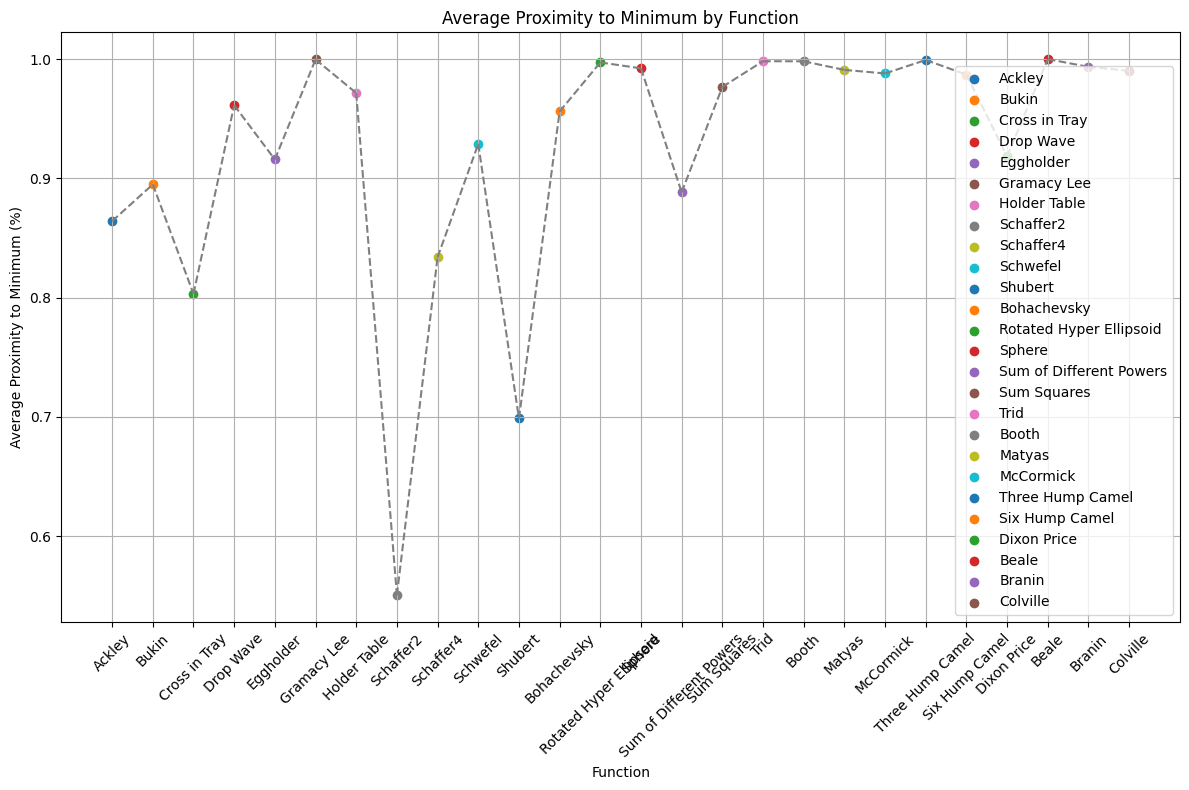

In [5]:
#25 Iterations
# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations_25(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Working on function: Ackley
0.9773066734918582
******
******
Working on function: Bukin
0.9399943434708855
******
******
Working on function: Cross in Tray
0.9919839670758259
******
******
Working on function: Drop Wave
0.9629982065434608
******
******
Working on function: Eggholder
0.9398022720389079
******
******
Working on function: Gramacy Lee
0.9988329767786122
******
******
Working on function: Holder Table
0.9972808067864057
******
******
Working on function: Schaffer2
0.5261755090685654
******
******
Working on function: Schaffer4
0.5926771843925617
******
******
Working on function: Schwefel
0.9930431684700398
******
******
Working on function: Shubert
0.9885091145595581
******
******
Working on function: Bohachevsky
0.9769753786913855
******
******
Working on function: Rotated Hyper Ellipsoid
0.999709867975418
******
******
Working on function: Sphere
0.9944659690622992
******
******
Working on function: Sum of Different Powers
0.9157382091620058
******
******
Working on func

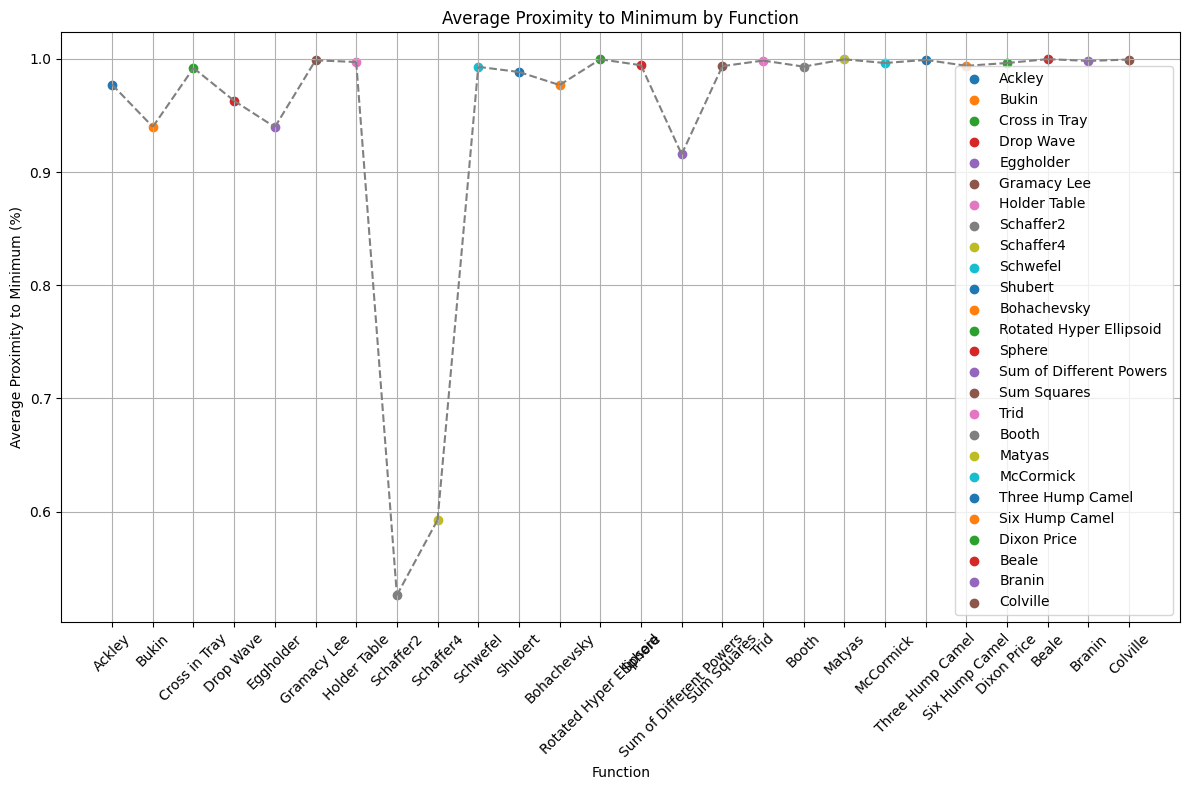

In [6]:
#50 Iterations
# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations_50(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Working on function: Ackley
0.9792560938662314
******
******
Working on function: Bukin
0.9847385920012339
******
******
Working on function: Cross in Tray
0.9998676478127169
******
******
Working on function: Drop Wave
0.8765238186704893
******
******
Working on function: Eggholder
0.9626639639514198
******
******
Working on function: Gramacy Lee
1.0000023212247544
******
******
Working on function: Holder Table
0.9999182219777526
******
******
Working on function: Schaffer2
0.9834658076065431
******
******
Working on function: Schaffer4
0.997748321826073
******
******
Working on function: Schwefel
0.9995015950386957
******
******
Working on function: Shubert
0.9430722947562397
******
******
Working on function: Bohachevsky
0.999946173728447
******
******
Working on function: Rotated Hyper Ellipsoid
0.9996193111163482
******
******
Working on function: Sphere
0.9999216119141402
******
******
Working on function: Sum of Different Powers
0.9612235239513945
******
******
Working on funct

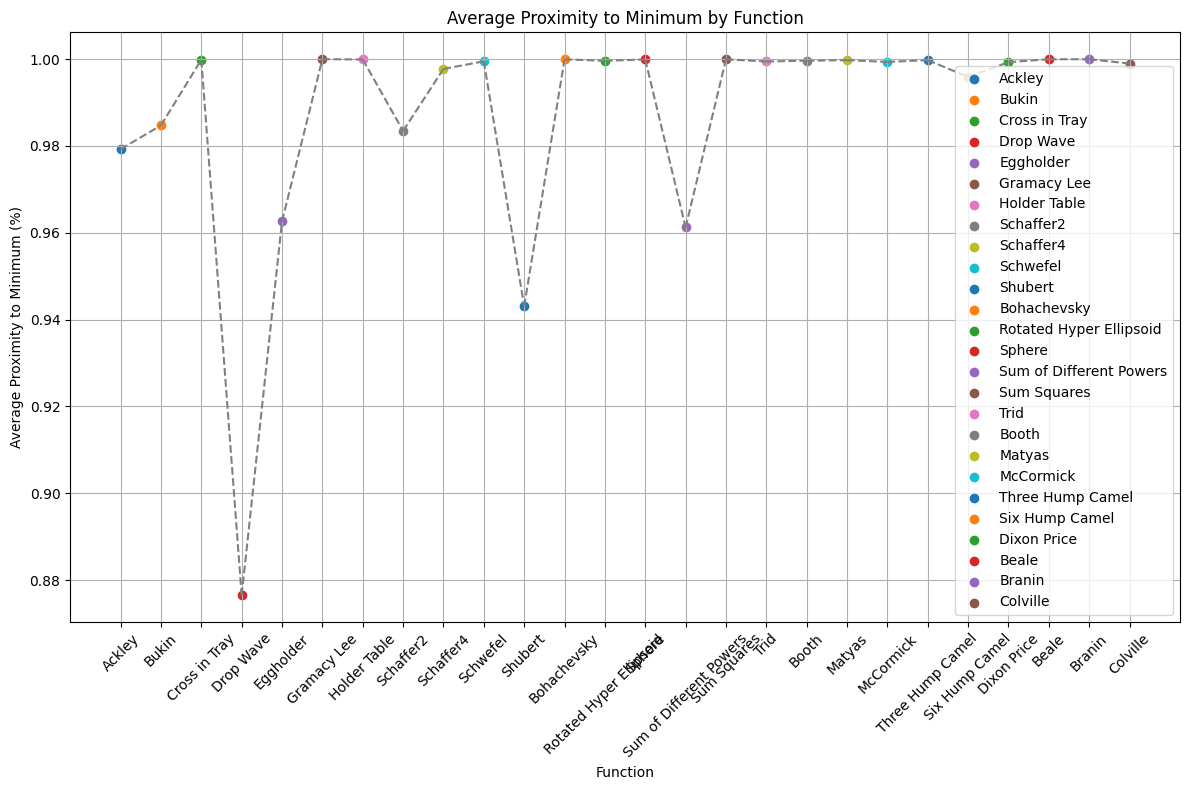

In [7]:
#100 Iterations
# Initial LHS, Candidate LHS
function_names = ex_func.function_ranges.keys()

# Her bir fonksiyon için işlemleri gerçekleştir
number_of_repeats = 1

average_proximities = {
    "Function": [],
    "Average Proximity to Minimum (%)": []
}

for function_name in function_names:
    if True:
    
        proximity_to_minimum_count = 0
        for i in range(number_of_repeats):
            iteration_count = 0
            if True:
                    
                try:
                    print(f"Working on function: {function_name}")

                    function_param = getattr(ex_func, function_name.lower().replace(" ", "_"))

                    # Aralığı al
                    range_param = ex_func.function_ranges[function_name]


                    # Generate initial samples
                    sampler = samplers.LatinHypercubeSampling(function_param)
                    initial_points = sampler.sample(num_samples=5, ranges=range_param)
                    initial_values = np.array([function_param(i) for i in initial_points])

                    # Train the initial model using random forests
                    rf_model = models.RandomForestModel(n_estimators=200, random_state=1729)
                    rf_model.train_model(initial_points, initial_values)
                    trained_rf_model = rf_model.get_model()

                    # Perform active learning
                    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
                    min_function_values, improvement, new_points_all, iteration = active_learning.run_active_learning_constant_iterations(2000, range_param, 3)
                    iteration_count += iteration
                    minimum_value_so_far = min(min_function_values)
                    
                    current_proximity =  minimum_value_so_far 
                    proximity_to_minimum_count += current_proximity
                    #print(proximity_to_minimum_count)

                    

                    #print(f"Actual global min value is: {ex_func.function_mins[function_name]}")
                
                    
                
                except Exception as e:
                    print(f"{function_name} function failed.")
                    print(e)

               
        if True:
            average_iterations = iteration_count/number_of_repeats
            current_average_func = ex_func.function_averages[function_name][0]
            current_minimum_func = ex_func.function_mins[function_name][0]
            average_proximity_to_minimum = proximity_to_minimum_count/number_of_repeats
            

            average_proximity_to_minimum_by_percent = (2*(current_average_func-current_minimum_func)-(average_proximity_to_minimum-current_minimum_func))/(2*(current_average_func-current_minimum_func))
            average_proximities["Function"].append(function_name)
            average_proximities["Average Proximity to Minimum (%)"].append(average_proximity_to_minimum_by_percent)
            #print(average_iterations)
            print(average_proximity_to_minimum_by_percent)

            print("******")
            print("******")
            

# Convert the dictionary to a DataFrame
average_proximities_df = pd.DataFrame(average_proximities)

# Plotting
plt.figure(figsize=(12, 8))
for i, (function, proximity) in enumerate(zip(average_proximities_df["Function"], average_proximities_df["Average Proximity to Minimum (%)"])):
    plt.scatter(i, proximity, label=function)

# Connect points with lines
for i in range(len(average_proximities_df["Function"]) - 1):
    plt.plot([i, i + 1], [average_proximities_df["Average Proximity to Minimum (%)"][i], average_proximities_df["Average Proximity to Minimum (%)"][i + 1]], color='gray', linestyle='--')

# Add labels and legend
plt.xlabel("Function")
plt.ylabel("Average Proximity to Minimum (%)")
plt.title("Average Proximity to Minimum by Function")
plt.xticks(range(len(average_proximities_df["Function"])), average_proximities_df["Function"], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
